<a href="https://colab.research.google.com/github/Shooleralbany/-home11-grad-2021-sh236571/blob/main/StatisticalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install cartopy
%pip install statsmodels
%pip install pyleoclim
%pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.4/996.4 kB 49.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.8/885.8 kB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pyleoclim as pyleo
import numpy as np

In [3]:
# Access Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir + '/Heartold.txt', sep='\t')
values1 = data['13C'].tolist()

# Check for missing values and remove them
values1 = [value for value in values1 if not pd.isna(value)]

# Calculate mean and standard deviation
mean_value = np.mean(values1)
std_deviation = np.std(values1)

# Define the multiplier for standard deviation to set the threshold
threshold_multiplier = 2  # Adjust as needed

# Calculate the threshold
threshold = mean_value + threshold_multiplier * std_deviation

print(f"Mean: {mean_value:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Threshold: {threshold:.2f}")


Mean: -27.33
Standard Deviation: 0.73
Threshold: -25.87


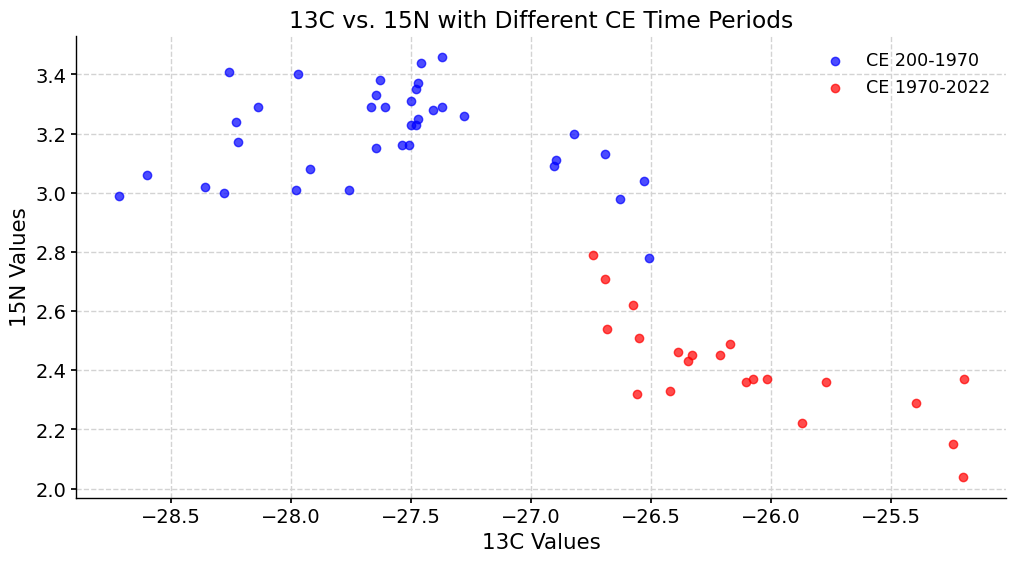

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir + '/Heartold.txt', sep='\t')

# Extract relevant columns
ce = data['CE']
c13 = data['13C']
n15 = data['15N']

# Define time periods (CE ranges)
start_period1 = 200
end_period1 = 1970
start_period2 = 1970
end_period2 = 2022

# Create masks for the two time periods
mask_period1 = (ce >= start_period1) & (ce <= end_period1)
mask_period2 = (ce > end_period1) & (ce <= end_period2)

# Plot the data with different colors for each time period
plt.figure(figsize=(12, 6))

# Plot data for the first time period (200-1970)
plt.scatter(c13[mask_period1], n15[mask_period1], label='CE 200-1970', color='blue', alpha=0.7)

# Plot data for the second time period (1970-2022)
plt.scatter(c13[mask_period2], n15[mask_period2], label='CE 1970-2022', color='red', alpha=0.7)

# Set labels and title
plt.xlabel('13C Values')
plt.ylabel('15N Values')
plt.title('13C vs. 15N with Different CE Time Periods')
plt.grid(True)
plt.legend()
plt.show()


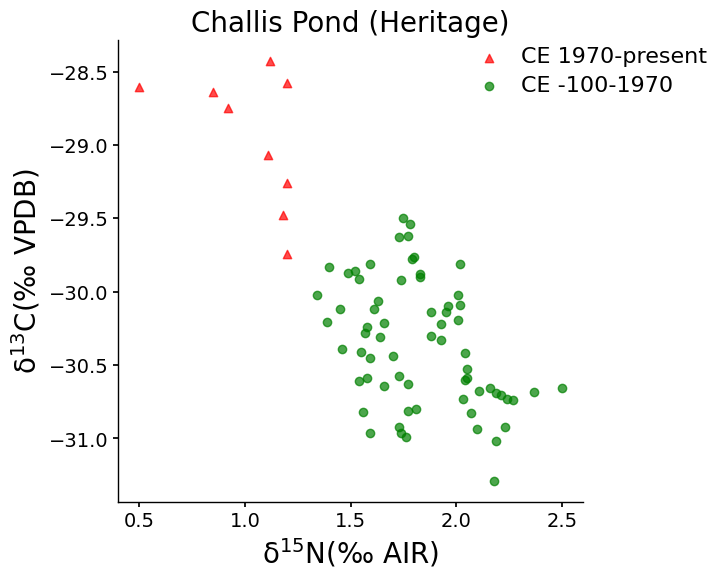

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir + '/Challisdata.txt', sep='\t')

# Extract relevant columns
ce = data['CE']
c13 = data['13C']
n15 = data['15N']

# Define time periods (CE ranges)
start_period1 = -100
end_period1 = 1970
start_period2 = 1970
end_period2 = 2022

# Create masks for the two time periods
mask_period1 = (ce >= start_period1) & (ce <= end_period1)
mask_period2 = (ce > end_period1) & (ce <= end_period2)

# Create a scatter plot with reversed axes and different colors for each time period
plt.figure(figsize=(6, 6))  # Increase the figure size for better visibility

# Plot data for the second time period (1970-2022)
plt.scatter(n15[mask_period2], c13[mask_period2], label='CE 1970-present', color='red', alpha=0.7, marker='^')

# Plot data for the first time period (-100-1970)
plt.scatter(n15[mask_period1], c13[mask_period1], label='CE -100-1970', color='green', alpha=0.7, marker='o')

# Set labels and title with increased font size
plt.xlabel('δ$^{15}$N(‰ AIR)', fontsize=20)
plt.ylabel('δ$^{13}$C(‰ VPDB)', fontsize=20)
plt.title('Challis Pond (Heritage)', fontsize=20)  # Increase title font size

# Configure the legend with increased font size
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))
for text in legend.get_texts():
    text.set_fontsize(16)  # Increase legend font size


plt.grid(False)

plt.show()



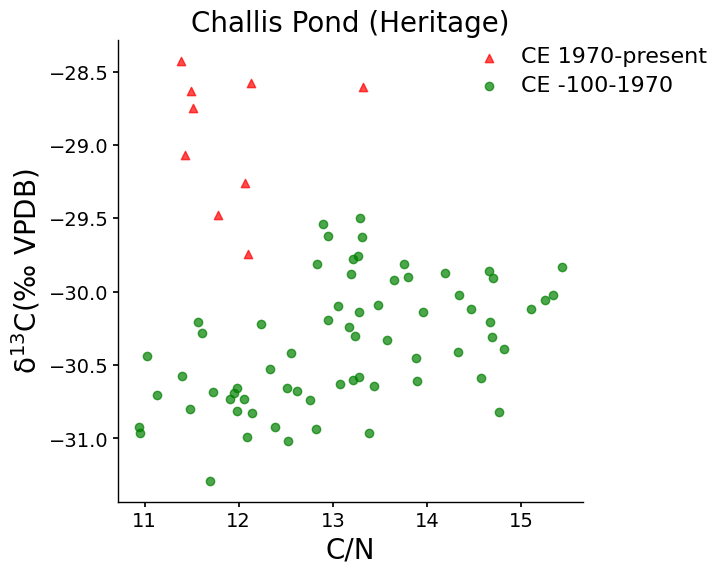

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir + '/Challisdata.txt', sep='\t')

# Extract relevant columns
ce = data['CE']
c13 = data['13C']
CN = data['CN']

# Define time periods (CE ranges)
start_period1 = -100
end_period1 = 1970
start_period2 = 1970
end_period2 = 2022

# Create masks for the two time periods
mask_period1 = (ce >= start_period1) & (ce <= end_period1)
mask_period2 = (ce > end_period1) & (ce <= end_period2)

# Create a scatter plot with reversed axes and different colors for each time period
plt.figure(figsize=(6, 6))

# Plot data for the second time period (1970-2022)
plt.scatter(CN[mask_period2], c13[mask_period2], label='CE 1970-present', color='red', alpha=0.7, marker='^')

# Plot data for the first time period (-3000-1970)
plt.scatter(CN[mask_period1], c13[mask_period1], label='CE -100-1970', color='green', alpha=0.7, marker='o')

# Set labels and title
plt.xlabel('C/N', fontsize=20)
plt.ylabel('δ$^{13}$C(‰ VPDB)', fontsize=20)
plt.title('Challis Pond (Heritage)', fontsize=20)

# Move the legend a little to the right within the bounding box
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))
for text in legend.get_texts():
    text.set_fontsize(16)  # Increase legend font size

plt.grid(False)

plt.show()



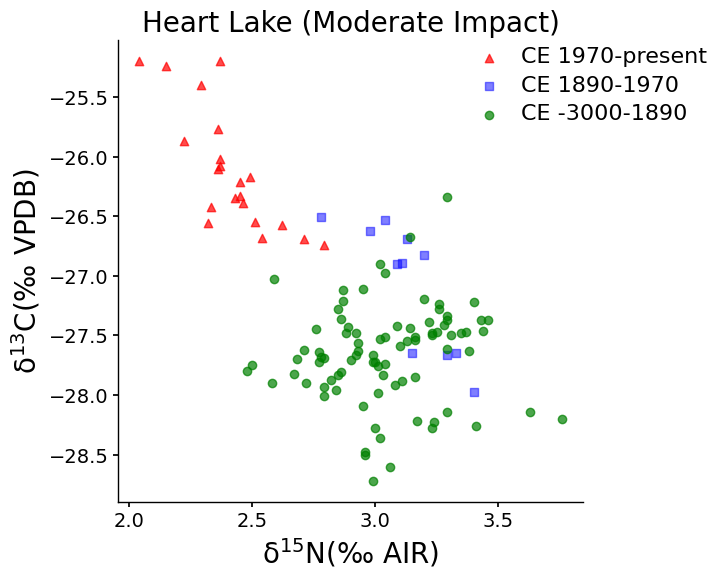

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir + '/Heartold.txt', sep='\t')

# Extract relevant columns
ce = data['CE']
c13 = data['13C']
n15 = data['15N']

# Define time periods (CE ranges)
start_period1 = -3000
end_period1 = 1890  # Updated time interval
start_period2 = 1890  # Updated time interval
end_period2 = 1970  # Updated time interval
start_period3 = 1970  # Updated time interval
end_period3 = 2022  # Updated time interval

# Create masks for the three time periods
mask_period1 = (ce >= start_period1) & (ce <= end_period1)
mask_period2 = (ce > end_period1) & (ce <= end_period2)
mask_period3 = (ce > end_period2) & (ce <= end_period3)

# Create a scatter plot with reversed axes and different colors for each time period
plt.figure(figsize=(6, 6))

# Plot data for the third time period (1970-2022)
plt.scatter(n15[mask_period3], c13[mask_period3], label='CE 1970-present', color='red', alpha=0.7, marker='^')

# Plot data for the second time period (1700-1970)
plt.scatter(n15[mask_period2], c13[mask_period2], label='CE 1890-1970', color='blue', alpha=0.5, marker='s')

# Plot data for the first time period (-3000-1700)
plt.scatter(n15[mask_period1], c13[mask_period1], label='CE -3000-1890', color='green', alpha=0.7, marker='o')

# Set labels and title
plt.xlabel('δ$^{15}$N(‰ AIR)', fontsize=20)
plt.ylabel('δ$^{13}$C(‰ VPDB)', fontsize=20)
plt.title('Heart Lake (Moderate Impact)', fontsize=20)
plt.grid(True)
plt.legend()

legend = plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))
for text in legend.get_texts():
    text.set_fontsize(16)  # Increase legend font size

plt.grid(False)

plt.show()



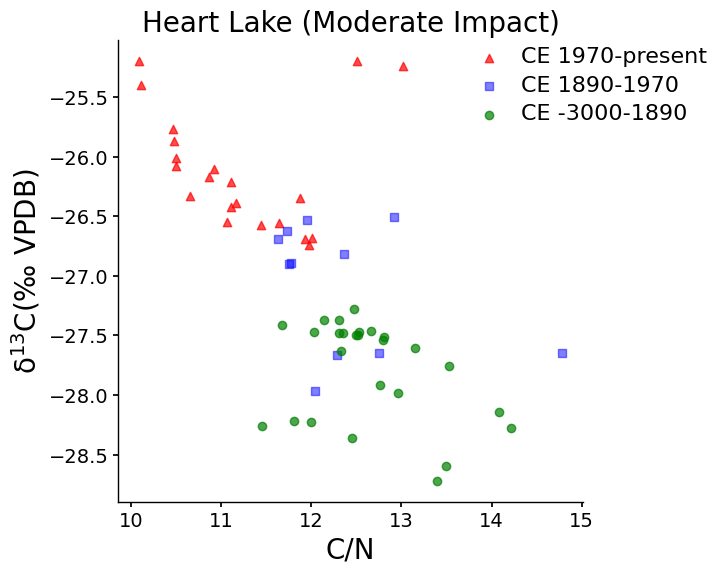

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir + '/Heartold.txt', sep='\t')

# Extract relevant columns
ce = data['CE']
c13 = data['13C']
CN = data['CN']

# Define time periods (CE ranges)
startperiod1 = -3000
end_period1 = 1890  # Updated time interval
start_period2 = 1890  # Updated time interval
end_period2 = 1970  # Updated time interval
start_period3 = 1970  # Updated time interval
end_period3 = 2022  # Updated time interval

# Create masks for the three time periods
mask_period1 = (ce >= start_period1) & (ce <= end_period1)
mask_period2 = (ce > end_period1) & (ce <= end_period2)
mask_period3 = (ce > end_period2) & (ce <= end_period3)

# Create a scatter plot with reversed axes and different colors for each time period
plt.figure(figsize=(6, 6))

# Plot data for the third time period (1970-2022)
plt.scatter(CN[mask_period3], c13[mask_period3], label='CE 1970-present', color='red', alpha=0.7, marker='^')

# Plot data for the second time period (1700-1970)
plt.scatter(CN[mask_period2], c13[mask_period2], label='CE 1890-1970', color='blue', alpha=0.5, marker='s')

# Plot data for the first time period (-3000-1700)
plt.scatter(CN[mask_period1], c13[mask_period1], label='CE -3000-1890', color='green', alpha=0.7, marker='o')

# Set labels and title
plt.xlabel('C/N', fontsize=20)
plt.ylabel('δ$^{13}$C(‰ VPDB)', fontsize=20)
plt.title('Heart Lake (Moderate Impact)', fontsize=20)
plt.grid(True)
plt.legend()

legend = plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))
for text in legend.get_texts():
    text.set_fontsize(16)  # Increase legend font size

plt.grid(False)

plt.show()


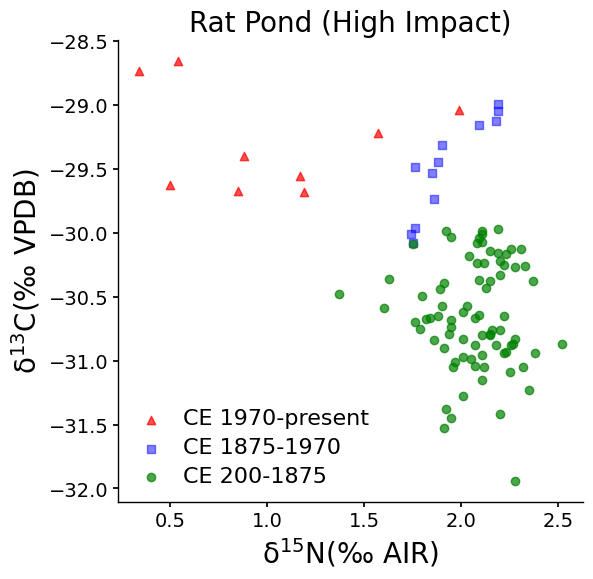

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir + '/Ratdata.txt', sep='\t')

# Extract relevant columns
ce = data['CE']
c13 = data['13C']
n15 = data['15N']

# Define time periods (CE ranges)
start_period1 = 200
end_period1 = 1875  # Updated time interval
start_period2 = 1875  # Updated time interval
end_period2 = 1970  # Updated time interval
start_period3 = 1970  # Updated time interval
end_period3 = 2022  # Updated time interval

# Create masks for the three time periods
mask_period1 = (ce >= start_period1) & (ce <= end_period1)
mask_period2 = (ce > end_period1) & (ce <= end_period2)
mask_period3 = (ce > end_period2) & (ce <= end_period3)

# Create a scatter plot with reversed axes and different colors for each time period
plt.figure(figsize=(6, 6))

# Plot data for the third time period (1970-2022)
plt.scatter(n15[mask_period3], c13[mask_period3], label='CE 1970-present', color='red', alpha=0.7, marker='^')

# Plot data for the second time period (1700-1970)
plt.scatter(n15[mask_period2], c13[mask_period2], label='CE 1875-1970', color='blue', alpha=0.5, marker='s')

# Plot data for the first time period (-3000-1700)
plt.scatter(n15[mask_period1], c13[mask_period1], label='CE 200-1875', color='green', alpha=0.7, marker='o')

# Set labels and title
plt.xlabel('δ$^{15}$N(‰ AIR)', fontsize=20)
plt.ylabel('δ$^{13}$C(‰ VPDB)', fontsize=20)
plt.title('Rat Pond (High Impact)', fontsize=20)
plt.grid(True)
plt.legend()

legend = plt.legend(loc='lower left')
#, bbox_to_anchor=(1.4, 1.02))
for text in legend.get_texts():
    text.set_fontsize(16)  # Increase legend font size

plt.grid(False)

plt.show()

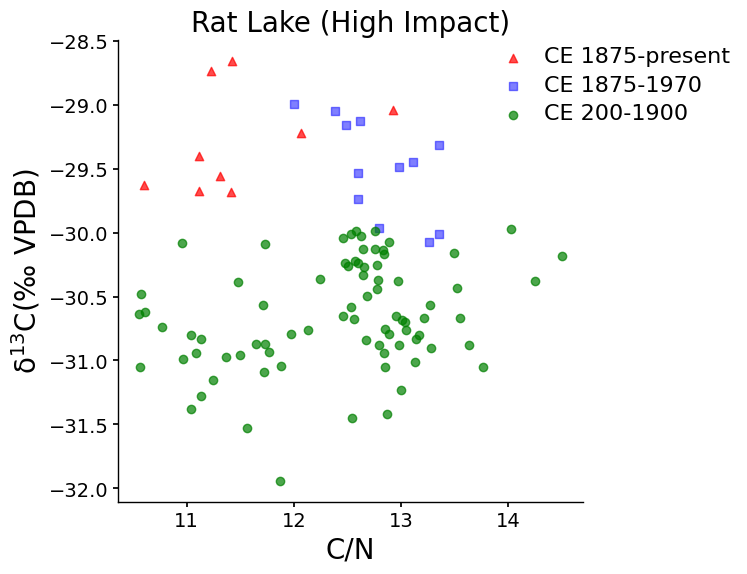

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Reading the data from the TXT file
data_dir = '/content/drive/MyDrive/Time Series'
data = pd.read_csv(data_dir + '/Ratdata.txt', sep='\t')

# Extract relevant columns
ce = data['CE']
c13 = data['13C']
CN = data['CN']

# Define time periods (CE ranges)
startperiod1 = 200
end_period1 = 1875  # Updated time interval
start_period2 = 1875  # Updated time interval
end_period2 = 1970  # Updated time interval
start_period3 = 1970  # Updated time interval
end_period3 = 2022  # Updated time interval

# Create masks for the three time periods
mask_period1 = (ce >= start_period1) & (ce <= end_period1)
mask_period2 = (ce > end_period1) & (ce <= end_period2)
mask_period3 = (ce > end_period2) & (ce <= end_period3)

# Create a scatter plot with reversed axes and different colors for each time period
plt.figure(figsize=(6, 6))

# Plot data for the third time period (1970-2022)
plt.scatter(CN[mask_period3], c13[mask_period3], label='CE 1875-present', color='red', alpha=0.7, marker='^')

# Plot data for the second time period (1700-1970)
plt.scatter(CN[mask_period2], c13[mask_period2], label='CE 1875-1970', color='blue', alpha=0.5, marker='s')

# Plot data for the first time period (-3000-1700)
plt.scatter(CN[mask_period1], c13[mask_period1], label='CE 200-1900', color='green', alpha=0.7, marker='o')

# Set labels and title
plt.xlabel('C/N', fontsize=20)
plt.ylabel('δ$^{13}$C(‰ VPDB)', fontsize=20)
plt.title('Rat Lake (High Impact)', fontsize=20)
plt.grid(True)
plt.legend()

legend = plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.02))
for text in legend.get_texts():
    text.set_fontsize(16)  # Increase legend font size

plt.grid(False)

plt.show()